<center>
    
# [Компьютерное зрение](https://cogmodel.mipt.ru/wiki/index.php/%D0%9A%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D0%BE%D0%B5_%D0%B7%D1%80%D0%B5%D0%BD%D0%B8%D0%B5)

## <center> Семинар 2 - Цветовые пространства, гистограммы изображений, интегральные изображения

<a target="_blank" href="https://colab.research.google.com/github/alexmelekhin/cv_course_2023/blob/main/seminars/seminar_02/Seminar_2.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

***

Источник используемого аэрофотоснимка: https://sovzond.ru/upload/medialibrary/267/%D0%98%D1%81%D1%85%D0%BE%D0%B4%D0%BD%D1%8B%D0%B9-%D0%B0%D1%8D%D1%80%D0%BE%D1%84%D0%BE%D1%82%D0%BE%D1%81%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA.jpg

In [1]:
from pathlib import Path

import cv2
import numpy as np

import matplotlib.pyplot as plt

In [2]:
IMG_PATH = "data/aerial_image.jpg"

if not Path(IMG_PATH).exists():
    !git clone https://github.com/alexmelekhin/cv_course_2023.git
    !mv cv_course_2023/seminars/seminar_02/data .

Cloning into 'cv_course_2023'...
remote: Enumerating objects: 137, done.
remote: Counting objects: 100% (137/137), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 137 (delta 43), reused 114 (delta 21), pack-reused 0
Receiving objects: 100% (137/137), 23.77 MiB | 28.74 MiB/s, done.
Resolving deltas: 100% (43/43), done.


# Цветовые пространства

Наиболее распространенным представлением цвета пикселя является пространство RGB. В таком представлении цвет представлен тремя числами: интенсивностями красного, зеленого и синего базисных цветов.

In [3]:
img = cv2.imread(IMG_PATH)

In [4]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

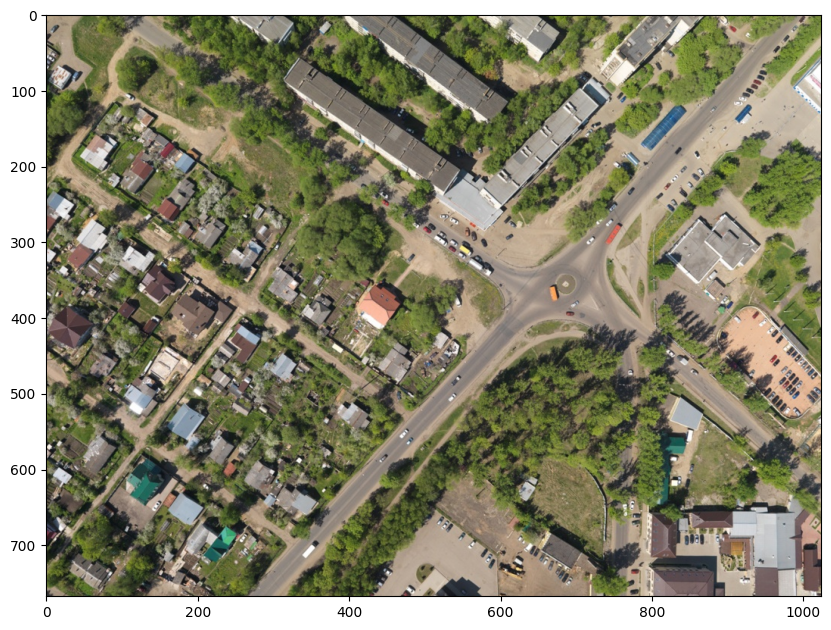

In [5]:
plt.figure(figsize=[10, 10])
plt.imshow(img_rgb)

cvtColor поддерживает конвертацию между множеством других цветовых схем. К примеру, чтобы получить серое изобаржение из цветного достаточно:

In [6]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

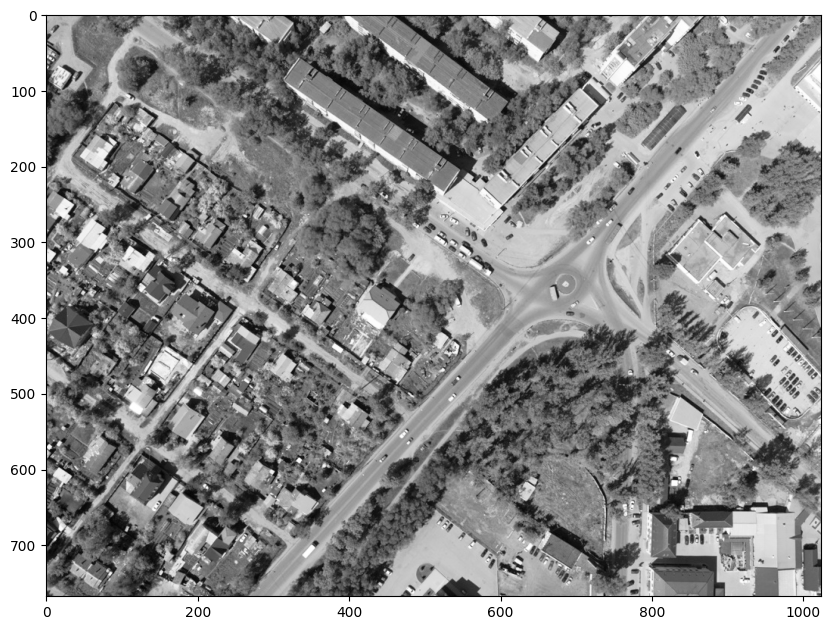

In [7]:
plt.figure(figsize=[10, 10])
plt.imshow(img_gray, cmap='Greys_r')

Если не предполагается использовать информацию о цвете пикселей, то можно сразу загрузить изображение в оттенках серого:

In [8]:
img_gray = cv2.imread(IMG_PATH, cv2.IMREAD_GRAYSCALE)

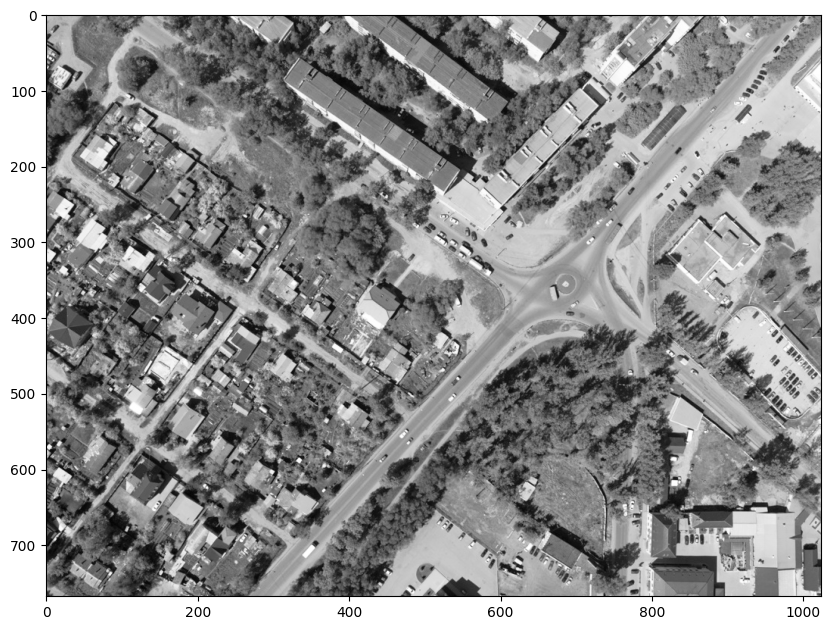

In [9]:
plt.figure(figsize=[10, 10])
plt.imshow(img_gray, cmap='Greys_r')

серое изображение - двумерный массив:

In [10]:
print('type(img_gray) = ', type(img_gray))
print('img_gray.shape = ', img_gray.shape)
print('img_gray.dtype = ', img_gray.dtype)

type(img_gray) =  <class 'numpy.ndarray'>
img_gray.shape =  (768, 1024)
img_gray.dtype =  uint8


## Упражнение 1: RGB $\to$ gray

Реализуйте функцию преобразования цветного изображения в формате RGB в серое

In [17]:
def convert_rgb_to_grayscale(img_rgb):
    return np.round(0.299*img_rgb[:, :, 0] + 0.587*img_rgb[:, :, 1] + 0.114*img_rgb[:, :, 2]).astype(int)

In [18]:
assert((cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY) == convert_rgb_to_grayscale(img_rgb)).all())

## Вопрос 1
Почему бы не использовать при преобразовании в серое просто среднее арифметическое?

**Ответ:** Потому-что разные цвета человеком воспринимаются по-разному (Из-за разного числа колбочек, воспринимающих цвет в глазу человека)

Кроме RGB/BGR и grayscale существуют и другие цветовые представления. Преобразования между ними можно осуществлять с помощью библиотеки OpenCV следующим способом:

### RGB $\to$ HSV

In [19]:
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

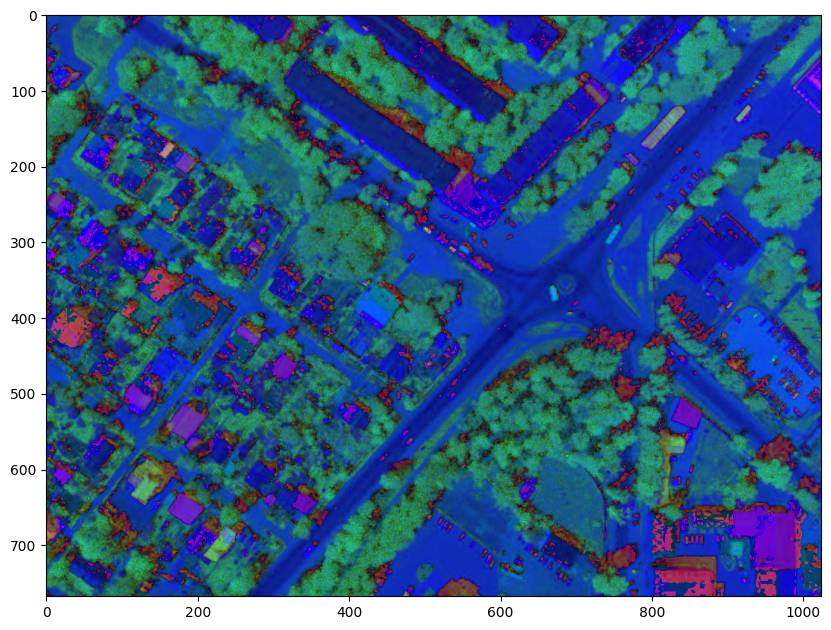

In [20]:
plt.figure(figsize=[10, 10])
plt.imshow(img_hsv)

### RGB $\to$ YUV

In [21]:
img_yuv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YUV)

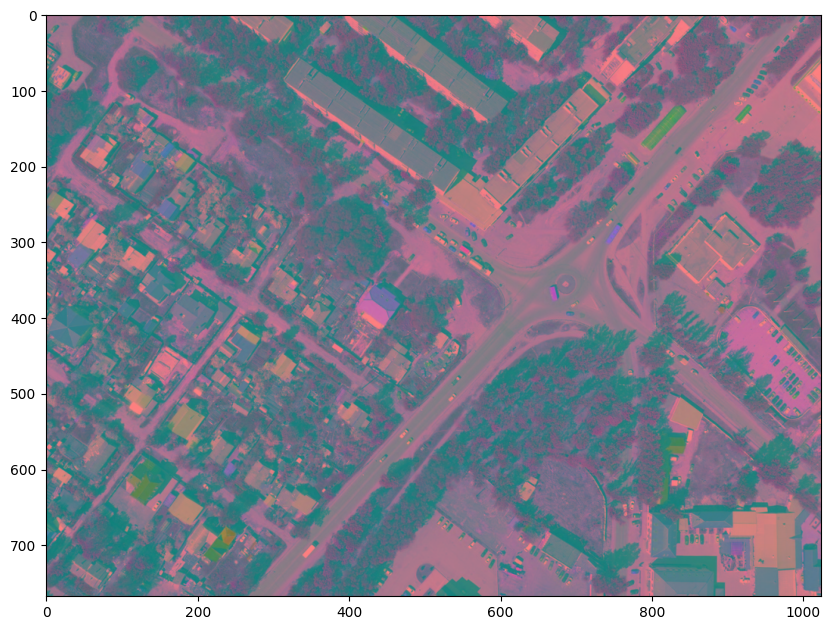

In [22]:
plt.figure(figsize=[10, 10])
plt.imshow(img_yuv)

## Упражнение 2
Попробуйте другие цветовые пространства, конвертация в которые реализована в OpenCV.

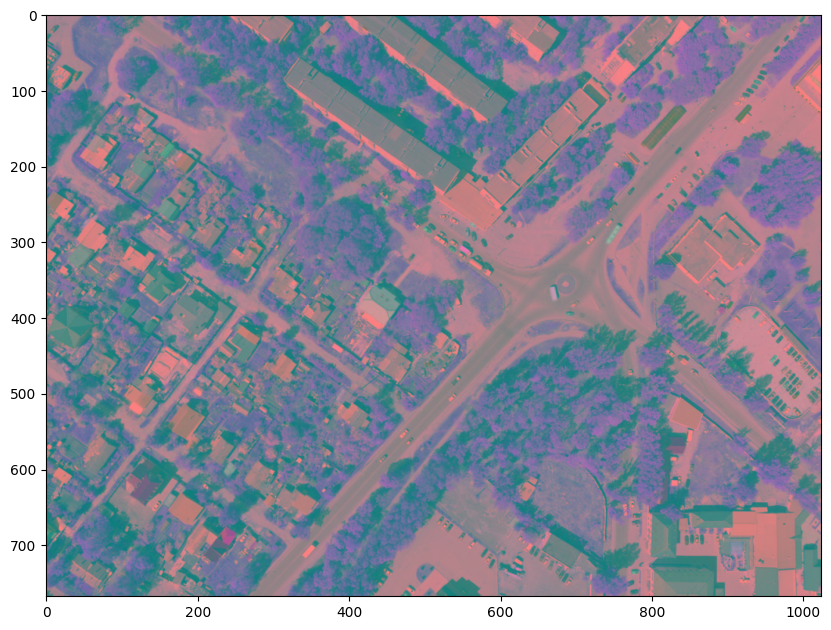

In [26]:
img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LAB)
plt.figure(figsize=[10, 10])
plt.imshow(img_lab)

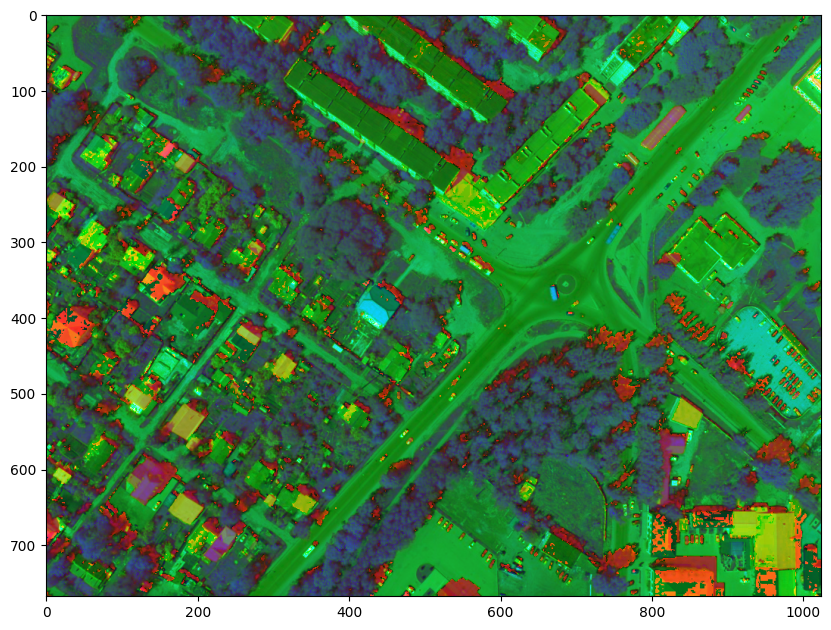

In [27]:
img_hls_full = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HLS_FULL)
plt.figure(figsize=[10, 10])
plt.imshow(img_hls_full)

## Упражнение 3: RGB $\to$ HSV

Реализуйте самостоятельно конвертацию из RGB в HSV и сравните её с реализацией в OpenCV.


In [28]:
def rgb_to_hsv180(rgb_image):
    # Convert RGB image to float values in range 0-1
    rgb_image = rgb_image.astype(np.float32) / 255.0
    
    # Split RGB channels
    r, g, b = rgb_image[:, :, 0], rgb_image[:, :, 1], rgb_image[:, :, 2]
    
    # Compute value/brightness channel
    v = np.max(rgb_image, axis=2)
    
    # Compute saturation channel
    s = np.zeros_like(v)
    mask = (v > 0)
    delta = np.zeros_like(v)
    delta[mask] = np.max(rgb_image, axis=2)[mask] - np.min(rgb_image, axis=2)[mask]
    s[mask] = delta[mask] / v[mask]
    
    # Compute hue channel
    h = np.zeros_like(v)
    mask = (delta > 0)
    mask1 = (v == r)
    mask2 = (v == g)
    mask3 = (v == b)
    h[mask & mask1] = ((g - b)[mask & mask1] / delta[mask & mask1]) % 6
    h[mask & mask2] = (b - r)[mask & mask2] / delta[mask & mask2] + 2
    h[mask & mask3] = (r - g)[mask & mask3] / delta[mask & mask3] + 4
    h[mask] *= 60
    h = np.round(h / 2).astype(np.uint8)
    
    # Stack HSV channels and convert to float values in range 0-1

    s *= 255
    v *= 255
    hsv_image = np.stack((h, s, v), axis=2).astype(np.float32)
    hsv_image = np.round(hsv_image)
    hsv_image = np.array(hsv_image, dtype=np.uint8)
    # 
    
    return hsv_image

In [29]:
custom_hsv = rgb_to_hsv180(img_rgb)
real_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

n_pixels = real_hsv.shape[0] * real_hsv.shape[1] * real_hsv.shape[2]
n_errors = np.sum(custom_hsv != real_hsv)
perc_errors = n_errors / n_pixels * 100
perc_errors

1.363160875108507

## Вопрос 2

В каких задачах переход из RGB в другое цветовое пространство может быть полезным?

**Ответ:** Например если у нас есть объект определенного цвета, который редко встречается в природе и который нужно отслеживать, хорошим приближением будет отслеживать местонахождение этого цвета. В этом случае может помочь HSV: мы сможем выделить необходимый цвет (по порогу) и отслеживать местоположение цвета.

# Гистограмма изображения

Напомним, что гистограммой изображения называется функция, показыващая количество пикселей изображения с заданным в качестве аргумента значением интенсивности:

$$
    h(v) = \sum_{x = 0}^{W - 1} \sum_{y = 0}^{H - 1} [f(x, y) = v] 
$$

Если дополнительно потребовать, чтобы $\sum_{v = 0}^{255} h(v) = 1$, то $h$ будет представлять функцию плотности распределения интенсивности на изображении.

Определим вспомогательную функцию, позволяющую визализировать гистограмму:

In [30]:
def visualize_hist(hist):
    plt.figure(figsize=[20, 5])
    plt.bar(np.arange(len(hist)), hist / hist.sum())

Рассчитать гистограмму можно с помощью встроенной функции OpenCV:

In [31]:
hist_cv = cv2.calcHist([img_gray],      # список изображений
                       [0],             # список каналов
                       None,            # маска (без маски)
                       [256],           # размер гистограммы
                       [0, 256])[:, 0]  # диапазон значений

Результат представляет собой обычный массив длины 256:

In [32]:
print('hist_cv.shape = ', hist_cv.shape)

hist_cv.shape =  (256,)


и выглядит следующим образом:

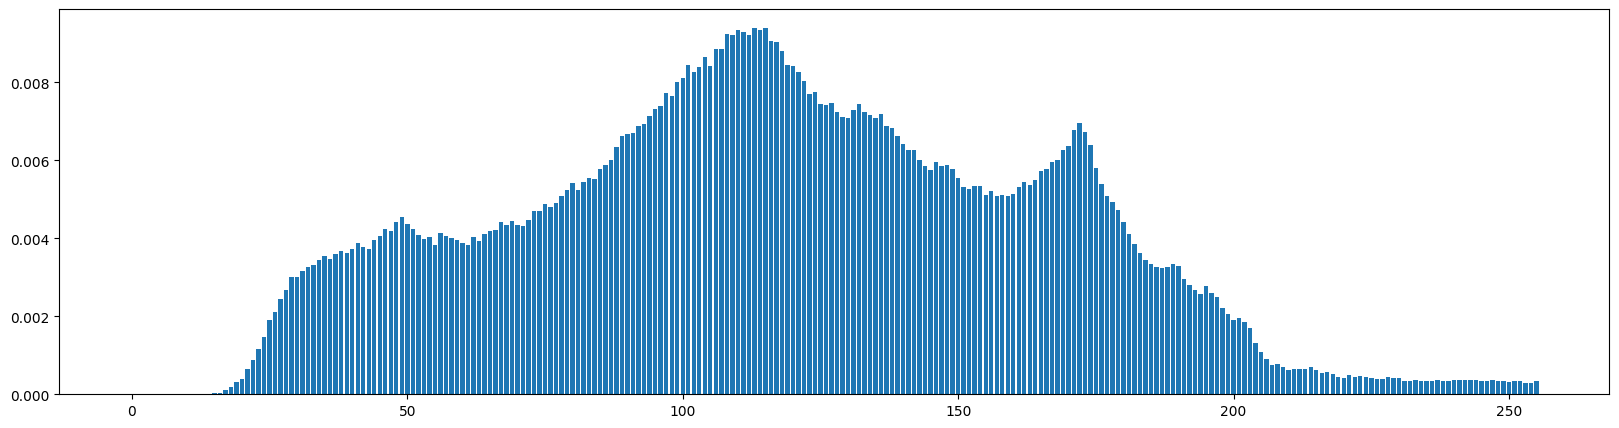

In [33]:
visualize_hist(hist_cv)

## Упражнение 4: Построение гистограммы

Реализуйте функцию для расчета гистограммы изображения.

In [58]:
def compute_hist(img):
    hist_array = []
    for i in range(0, 256):
        hist_array.append((img == i).sum())
    hist_array = np.array(hist_array).astype(np.float32)
    hist_array /= img.shape[0]*img.shape[1]
    return hist_array

In [59]:
hist_my = compute_hist(img_gray)

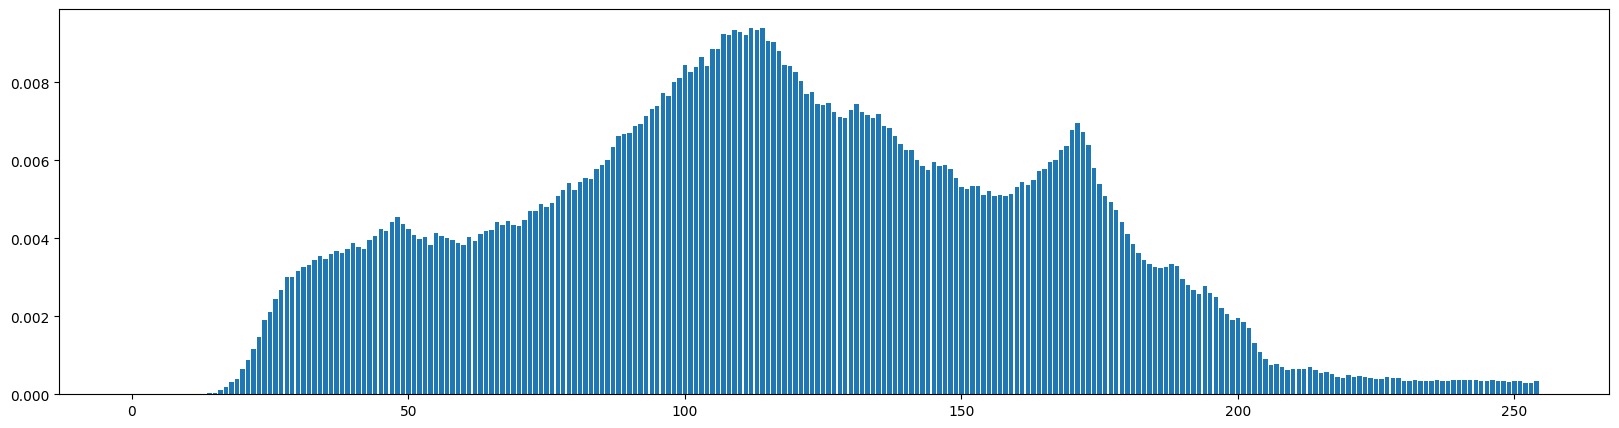

In [60]:
visualize_hist(hist_my)

In [62]:
# По каким-то причинам assert провалился. Но видно, что графики идентичны
assert((hist_my == hist_cv).all())

<ipython-input-62-6c8116917210>:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  assert((hist_my == hist_cv).all())


AttributeError: ignored

 ## Вопрос 3

 Что можно сказать об изображении по его гистограмме?

**Ответ:** Возможно, можно сделать вывод о времени съемки (Имеются ввиду часы, а не дата). Ночью освещенность низкая, утром - высокая.

## Вопрос 4

Допустим, вы смотрите некоторый фильм и для текущего кадра выводите его гистограмму. Как будет меняться эта гистограмма с течением времени?

**Ответ:** Точно сказать нельзя, но точно можно быть уверенным, что когда пойдут титры, то распределение сместится ближе к 0. (Много темноты)

## Упражнение 5: JPEG и гистограмма

Исследуйте, как влияет степень сжатия алгоритма JPEG на вид гистограммы изображения.

Возьмём тоже самое изображение из упражнения выше. Сожмём его

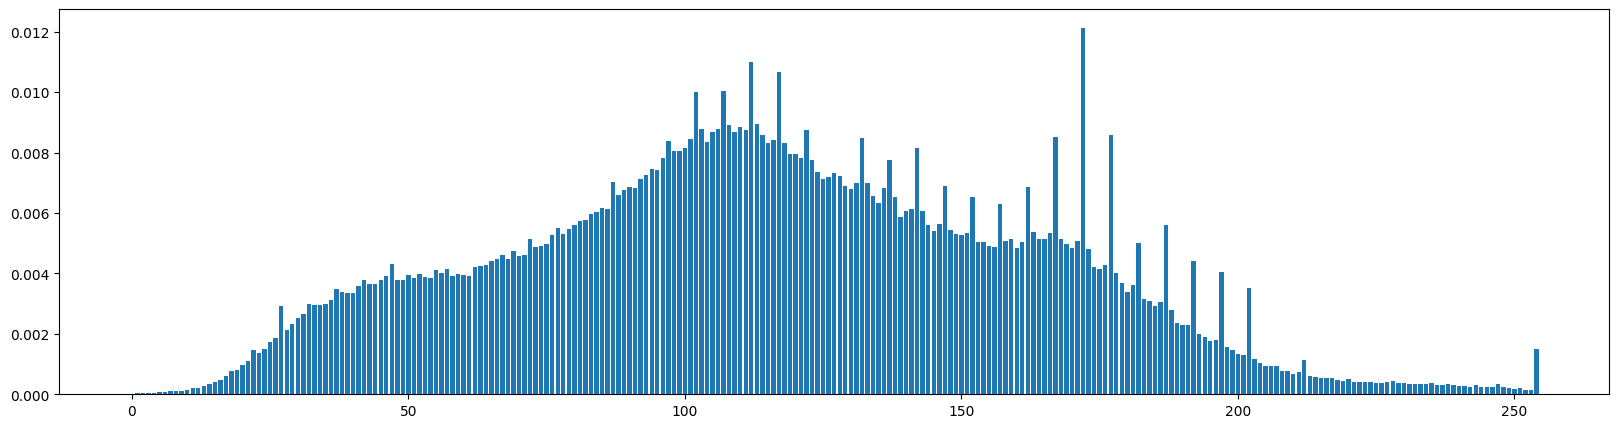

In [77]:
ok, img_shakal = cv2.imencode(".jpg", img_gray, (cv2.IMWRITE_JPEG_QUALITY, 20))
img_shakal = cv2.imdecode(img_shakal, cv2.IMREAD_COLOR)
hist_my = compute_hist(img_shakal)
visualize_hist(hist_my)

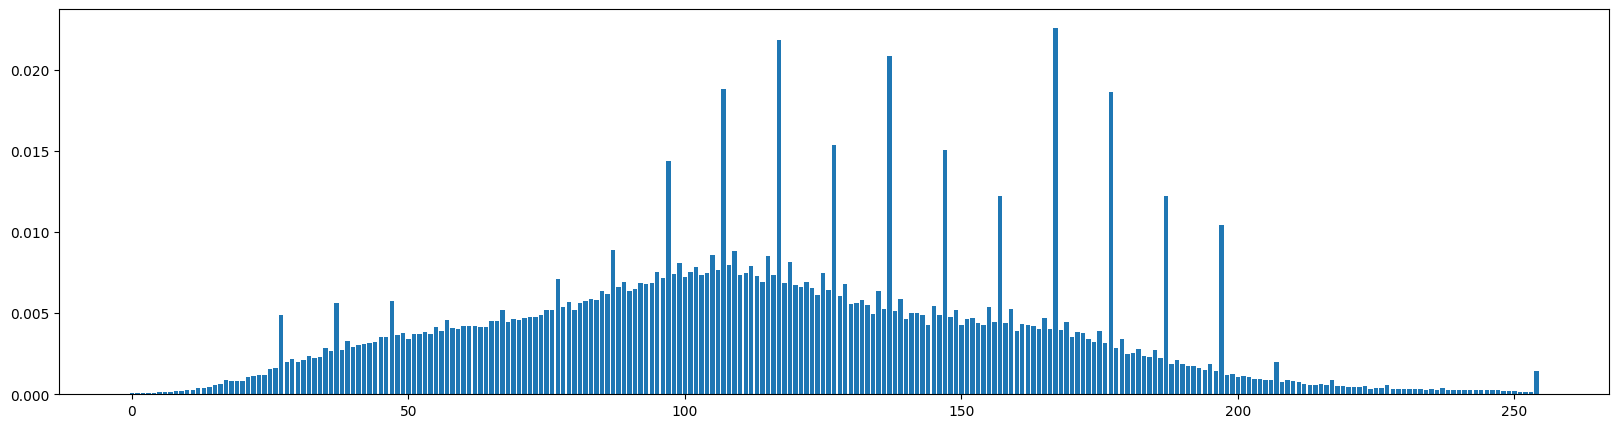

In [78]:
ok, img_shakal = cv2.imencode(".jpg", img_gray, (cv2.IMWRITE_JPEG_QUALITY, 10))
img_shakal = cv2.imdecode(img_shakal, cv2.IMREAD_COLOR)
hist_my = compute_hist(img_shakal)
visualize_hist(hist_my)

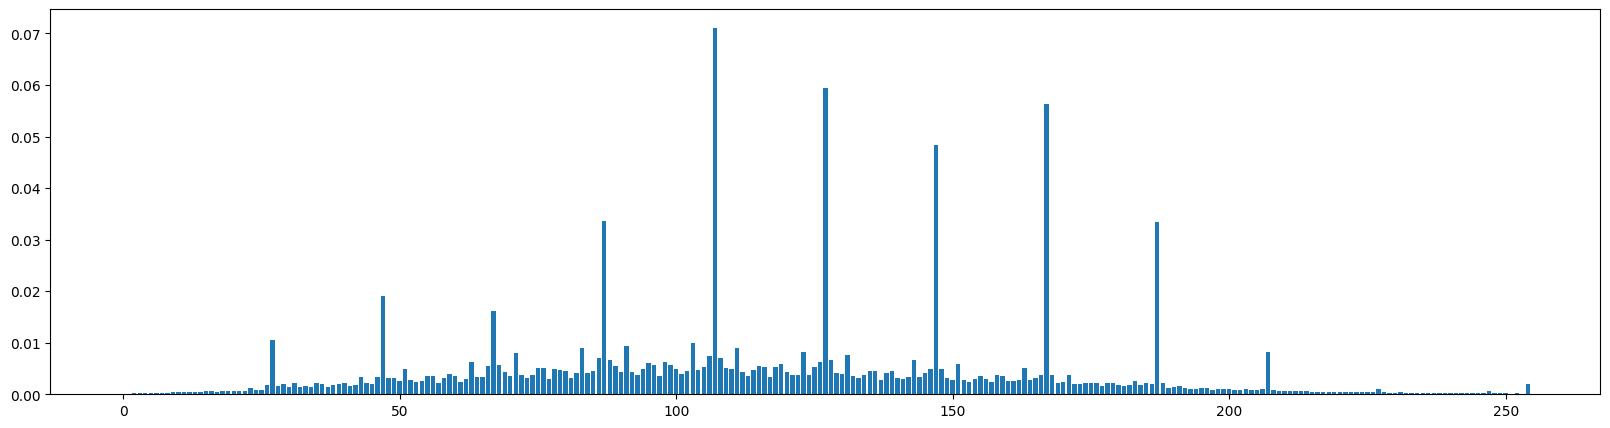

In [79]:
ok, img_shakal = cv2.imencode(".jpg", img_gray, (cv2.IMWRITE_JPEG_QUALITY, 5))
img_shakal = cv2.imdecode(img_shakal, cv2.IMREAD_COLOR)
hist_my = compute_hist(img_shakal)
visualize_hist(hist_my)

Судя по этому изображению, распределение интенсивностей вырождается: мы видим болльшие группы пикселей с одинаковой интенсивностью

## Упражнение 6: Сегментация

На загруженном аэроортофотоплане выделите зеленые насаждения. Для этого постройте бинарную маску, где 1 будет отвечать наличию насаждений в данном пикселе, 0 - их отсутствию, и визуализируйте её. А также рассчитайте, какую долю изображения занимают зеленые насаждения. С какой ошибкой (погрешностью) получена эта величина?

Подсказка: вам должно помочь HSV пространство и гистограмма. Погрешность может быть оценена на глаз, по вашей неуверенности в определении порога отделения классов 'зеленые насаждения'/'прочее'.

In [ ]:
img_hsv_gray = cv2.cvtColor(img_hsv, cv2.COLOR_BGR2GRAY)

In [ ]:
plt.figure(figsize=[15, 10])
plt.subplot(1, 2, 1)
plt.imshow(img) 

plt.subplot(1, 2, 2)
plt.imshow(img_hsv) 

In [ ]:
plt.figure(figsize=[15, 10])
plt.subplot(1, 2, 1)
plt.imshow(img) 

plt.subplot(1, 2, 2)
plt.imshow(img_hsv_gray)

In [ ]:
hist_hsv_gray = cv2.calcHist([img_hsv_gray],      # список изображений
                       [0],             # список каналов
                       None,            # маска (без маски)
                       [256],           # размер гистограммы
                       [0, 256])[:, 0]  # диапазон значений

visualize_hist(hist_hsv_gray)

In [ ]:
mask = img_hsv_gray > 100

In [ ]:
plt.figure(figsize=[15, 10])
plt.subplot(1, 2, 1)
plt.imshow(img) 

plt.subplot(1, 2, 2)
plt.imshow(mask, alpha=0.8)

In [ ]:
sum(sum(mask)) / (mask.shape[0] * mask.shape[1]) * 100

# Упражнение 7: Интегральное изображение
Напомним, что интегральным изображением называется следующая функция:
$$
    I(x, y) = \sum_{i = 0}^{x} \sum_{j = 0}^{y} f(i, j)
$$
С помощью интегрального изображения можно за $O(1)$ вычислять сумму интенсивностей в произвольной прямоугольной области. Требуется реализовать расчет интегрального изображения, а также быстрый расчет сумм интенсивностей в прямоугольнике заданном верхним левым углом, шириной и высотой $x, y, w, h$.

In [81]:
a = np.zeros((2, 5))
print(a)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [85]:
class IntegralImage:

    def __init__(self, img):
        assert(len(img.shape) == 2)  # только для серых изображений

        self.img = img
        self.integral_calculation = np.zeros(img.shape)
        height, width = self.img.shape
        for i in range(height):
            for j in range(width):
                self.integral_calculation[i][j] = self.img[:i, :j].sum()

    def sum(self, x, y, w, h):
        return self.integral_calculation[y+h, x+w] -\
        self.integral_calculation[y+h][x] -\
        self.integral_calculation[y][x+w] +\
        self.integral_calculation[y][x]


In [86]:
I = IntegralImage(img_gray)

In [87]:
x, y, w, h = 0, 0, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

x, y, w, h = 100, 100, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

## Вопрос 5

В каких задачах может потребоваться использовать интегральное изображение?

**Ответ:** в задачах, где необходимо уметь многократно и быстро выполнять расчёт яркости на участке изображения

## Вопрос 6

Какому методу решения задачи в программировании следует метод расчета интегрального изображения?

**Ответ:** Динамическое программирование